# Aim: To Run Lasso Regression on the Dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [55]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [56]:
import sys
import os
import math
import csv
import json

## Helper Methods and Variables

In [83]:
def sentence_to_snake_case(sentence):
    # Split the sentence into words, convert to lowercase, and join with underscores
    snake_case = '_'.join(word.lower() for word in sentence.split())
    return snake_case

In [84]:
useless_cols = ['CustomerID', 'Count', 'Country', 'State', 'City', \
                'Zip Code', 'Lat Long', 'Churn Score', 'Churn Label', 'CLTV', 'Churn Reason', 'Total Charges']

In [85]:
y_cols = ['Churn Value', 'Tenure Months']

## Prepare the Data

In [86]:
os.getcwd()

'C:\\D Drive\\University of Washington\\Study\\Quarter 2\\DATA 557\\Project\\ML'

In [87]:
data = pd.read_csv('../data/Telco_customer_churn_cleaned.csv')

In [88]:
data.head()

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [90]:
# data.columns

In [92]:
# data.head()

In [93]:
data.shape

(7043, 34)

In [94]:
data = data.rename(columns = lambda column: sentence_to_snake_case(column))

In [95]:
data.head()

,unnamed:_0,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [96]:
# Leaving in Customer ID just in case
useless_cols = [sentence_to_snake_case(column) for column in useless_cols]

In [97]:
y_cols = [sentence_to_snake_case(column) for column in y_cols]

In [98]:
y_cols

['churn_value', 'tenure_months']

In [99]:
# Drop the first column "Unnamed" and the useless columns
data = data.drop([data.columns[0]] + useless_cols, axis=1)

In [100]:
data.head()

,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_value
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1


In [115]:
# data.dtypes

## Get either the best case or worst case scenario

### The data being set from here will decide how the model will treat its unknown churn customers

**Our y is a check on whether the user will churn within 12 months or not**

In [101]:
def best_case_churn(row):
    # User has definitely not churned within the 12 months
    if row['tenure_months'] >= 12: return 0
    # User has definitely churned within the 12 months
    if row['tenure_months'] < 12 and row['churn_value'] == 1: return 1
    # Best case assumption
    return 0

In [102]:
def worst_case_churn(row):
    # User has definitely not churned within the 12 months
    if row['tenure_months'] >= 12: return 0
    # User has definitely churned within the 12 months
    if row['tenure_months'] < 12 and row['churn_value'] == 1: return 1
    # Best case assumption
    return 1

### Switch the following line to switch between best case and worst case

In [103]:
main_y_col = 'churn'

In [104]:
data[main_y_col] = data.apply(best_case_churn, axis=1)

In [105]:
data['tenure_months'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72,  0], dtype=int64)

In [106]:
y_cols.extend([main_y_col])
data[y_cols]

,churn_value,tenure_months,churn
0,1,2,1
1,1,2,1
2,1,8,1
3,1,28,0
4,1,49,0
...,...,...,...
7038,0,72,0
7039,0,24,0
7040,0,72,0
7041,0,11,0


In [107]:
y_cols

['churn_value', 'tenure_months', 'churn']

## Divide the dataset into train and test test

In [108]:
RNG = np.random.RandomState(seed=420)

In [109]:
train, test = train_test_split(data, test_size=0.1, shuffle=True, random_state=RNG)

In [110]:
train.shape

(6338, 22)

In [111]:
test.shape

(705, 22)

## Pre-process the data

### Normalize

**Remember to save normalization details of train data, to apply to test data**

Pipeline transforms automatically do so for us.

In [112]:
dtypes = data.dtypes

In [116]:
# Prepare to Standardize all numeric columns except Churn Value
numeric_cols = list(data.select_dtypes(include=['int64', 'float64']))
numeric_cols = [column for column in numeric_cols if column not in y_cols]
numeric_cols

['latitude', 'longitude', 'monthly_charges']

In [117]:
# Pipeline is to maintain consistency
standardization_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [118]:
# ColumnTransformer helps standardize only selected columns
preprocessor = ColumnTransformer(
    transformers=[('num', standardization_transformer, numeric_cols)],
    remainder='passthrough'  # This leaves the rest of the columns in the dataset unchanged
)

In [119]:
preprocessed_train_array = preprocessor.fit(train).transform(train)

In [120]:
# train

Convert the preprocessed arrays into pandas dataframe, by taking into account the correct column names, and the correct column types.

In [121]:
preprocessed_columns = [col.split('__')[1] for col in preprocessor.get_feature_names_out()]
# preprocessed_columns

## Warning!! Bad Coding Practice Alert

In [122]:
# Instead of mapping preprocessed_columns with the old data.columns and getting the dtypes
# for now we will proceed with hard-coding logic
# Because columns that have prefix num are obviously float
# While other columns are either object or can be treated as object (except Churn Value which will separately be made int64)
preprocessed_column_types = ['float64' if col.split('__')[0]=='num' else 'object' for col in preprocessor.get_feature_names_out()]

In [123]:
preprocessed_column_types[-1] = 'int64'

In [124]:
preprocessed_column_dtypes = {preprocessed_columns[i]: preprocessed_column_types[i] for i in range(len(preprocessed_columns))}

In [125]:
preprocessed_train = pd.DataFrame(data=preprocessed_train_array, columns=preprocessed_columns)
preprocessed_train = preprocessed_train.astype(preprocessed_column_dtypes)

In [126]:
preprocessed_train.head()

,latitude,longitude,monthly_charges,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn
0,-0.498158,-0.371946,1.295086,Male,No,Yes,Yes,60,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0,0
1,-1.423199,1.358143,-1.516232,Female,No,No,No,20,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),0,0
2,0.444907,-1.026476,0.965322,Male,No,No,No,17,Yes,No,...,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,1,0
3,1.202459,-0.117674,-1.514566,Female,No,No,No,29,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,0
4,-0.899465,0.660012,0.653879,Female,No,No,No,49,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0,0


In [127]:
# preprocessed_train.dtypes

In [128]:
preprocessed_test_array = preprocessor.transform(test)

In [129]:
preprocessed_test = pd.DataFrame(data=preprocessed_test_array, columns=preprocessed_columns)
preprocessed_test = preprocessed_test.astype(preprocessed_column_dtypes)

In [130]:
preprocessed_test.head()

,latitude,longitude,monthly_charges,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn
0,1.077896,-1.383298,1.331726,Female,Yes,Yes,No,62,Yes,Yes,...,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,0,0
1,-0.903949,0.703809,-1.479591,Male,No,No,No,47,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0,0
2,-0.863037,0.738054,-0.165534,Male,No,No,No,9,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,0,0
3,0.495985,-1.031974,0.868725,Female,Yes,No,No,32,Yes,No,...,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,0,0
4,0.898898,-0.799467,0.184215,Female,No,No,No,4,Yes,No,...,No,No,No,No,No,Month-to-month,No,Electronic check,1,1


In [131]:
# preprocessed_test.dtypes

### Split Datasets into X and y

(Not useful if using statsmodels api)

In [132]:
X_columns = list(preprocessed_train.columns)

In [134]:
X_columns = [column for column in X_columns if column not in y_cols]

In [135]:
# X_columns

In [136]:
X_train, y_train = preprocessed_train[X_columns], preprocessed_train[main_y_col]

In [137]:
X_test, y_test = preprocessed_test[X_columns], preprocessed_test[main_y_col]

### Dimensionality Reduction?

Maybe later. Not relevant to Lasso Regression

## Run Lasso Logistic Regression

In [138]:
# preprocessed_column_types

In [139]:
# preprocessed_train_array

In [140]:
# preprocessed_train.dtypes

In [141]:
preprocessed_train.columns

Index(['latitude', 'longitude', 'monthly_charges', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'churn_value', 'churn'],
      dtype='object')

In [147]:
def formulaGenerator(data, y_cols = [''], main_y_col=''):
    x_cols = [column for column in list(data.columns) if column not in y_cols]
    formula = f'{main_y_col} ~'
    for index, column in enumerate(x_cols):
        if index != 0: formula = f'{formula} +'
        if data.dtypes[column] in ['int64', 'float64']: formula = f'{formula} {column}'
        else: formula = f'{formula} C({column})'
    return formula

In [149]:
formula = formulaGenerator(preprocessed_train, y_cols, main_y_col)
formula

'churn ~ latitude + longitude + monthly_charges + C(gender) + C(senior_citizen) + C(partner) + C(dependents) + C(phone_service) + C(multiple_lines) + C(internet_service) + C(online_security) + C(online_backup) + C(device_protection) + C(tech_support) + C(streaming_tv) + C(streaming_movies) + C(contract) + C(paperless_billing) + C(payment_method)'

In [151]:
model = smf.logit(formula = formula, data = preprocessed_train)
results = model.fit_regularized(method='l1', alpha=10, QC_verbose=False)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2976833745993948
            Iterations: 140
            Function evaluations: 140
            Gradient evaluations: 140


In [152]:
# results.summary()

In [228]:
param_grid = {'alpha': np.logspace(-5, 3, 100)}

In [229]:
param_list = list(ParameterGrid(param_grid))

In [230]:
# param_list

In [231]:
coefficients = None

In [232]:
for params in param_list:
    # Fit the model with the given parameters
    try:
        results = model.fit_regularized(method='l1', QC_verbose=False, **params)
    except:
        print(params)
    
    # Store the coefficients
    row = pd.DataFrame(results.params).transpose()
    row = pd.concat([row, pd.DataFrame.from_dict({'regularization': [params['alpha']]})], axis=1)
    if coefficients is None: 
        coefficients = row
    else: 
        coefficients = pd.concat([coefficients, row], ignore_index=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440513450165144
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440518519503815
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744052462279085
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744053197023317
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440540814467296
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.274405514589848
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440564268167394
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 29 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744057967921
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 28 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440598216243894
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744062050700277
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 29 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440647302396465
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440679499362264
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440718167338274
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744076457862824
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744082024277128
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144
{'alpha': 0.00013530477745798074}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440886944748394
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27440966786383125
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144
{'alpha': 0.00019630406500402724}
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744106222952568
            Iterations: 144
            Function evaluations: 145
            Gradient evaluations: 144


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27441176138403267
            Iterations: 145
            Function evaluations: 145
            Gradient evaluations: 145
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744131181665524
            Iterations: 145
            Function evaluations: 145
            Gradient evaluations: 145


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 29 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27441473031732594
            Iterations: 145
            Function evaluations: 145
            Gradient evaluations: 145
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744166401504589
            Iterations: 145
            Function evaluations: 145
            Gradient evaluations: 145


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 29 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 27 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed Q

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744188941059839
            Iterations: 145
            Function evaluations: 146
            Gradient evaluations: 145
{'alpha': 0.0005994842503189409}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 26 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744144492037954
            Iterations: 204
            Function evaluations: 204
            Gradient evaluations: 204


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27441624403646236
            Iterations: 205
            Function evaluations: 205
            Gradient evaluations: 205


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744183714718695
            Iterations: 211
            Function evaluations: 211
            Gradient evaluations: 211


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744208915504737
            Iterations: 208
            Function evaluations: 208
            Gradient evaluations: 208
{'alpha': 0.0012618568830660211}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27442387451392497
            Iterations: 209
            Function evaluations: 209
            Gradient evaluations: 209


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744274019632876
            Iterations: 210
            Function evaluations: 210
            Gradient evaluations: 210


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 13 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.274431654067852
            Iterations: 204
            Function evaluations: 204
            Gradient evaluations: 204


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744364938876186
            Iterations: 202
            Function evaluations: 202
            Gradient evaluations: 202


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27444114490080657
            Iterations: 207
            Function evaluations: 208
            Gradient evaluations: 207


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27444635128143996
            Iterations: 207
            Function evaluations: 208
            Gradient evaluations: 207


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27443724185774215
            Iterations: 284
            Function evaluations: 284
            Gradient evaluations: 284


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27443327706689674
            Iterations: 517
            Function evaluations: 517
            Gradient evaluations: 517


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 15 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27444372738363465
            Iterations: 424
            Function evaluations: 424
            Gradient evaluations: 424


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27443928208750484
            Iterations: 497
            Function evaluations: 497
            Gradient evaluations: 497
{'alpha': 0.008111308307896872}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 11 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27444501166304036
            Iterations: 500
            Function evaluations: 500
            Gradient evaluations: 500


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 16 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27445211512482187
            Iterations: 509
            Function evaluations: 509
            Gradient evaluations: 509


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744600105733571
            Iterations: 516
            Function evaluations: 516
            Gradient evaluations: 516


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744706579123884
            Iterations: 527
            Function evaluations: 527
            Gradient evaluations: 527


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 20 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2744833872857366
            Iterations: 504
            Function evaluations: 504
            Gradient evaluations: 504
{'alpha': 0.020565123083486535}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 20 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27449855949887675
            Iterations: 505
            Function evaluations: 505
            Gradient evaluations: 505


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2745166597055917
            Iterations: 501
            Function evaluations: 502
            Gradient evaluations: 501


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 15 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27453798409566393
            Iterations: 493
            Function evaluations: 493
            Gradient evaluations: 493


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27456326764250577
            Iterations: 473
            Function evaluations: 474
            Gradient evaluations: 473


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 13 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27459291143367054
            Iterations: 491
            Function evaluations: 491
            Gradient evaluations: 491
{'alpha': 0.0521400828799969}


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.274628786590579
            Iterations: 473
            Function evaluations: 473
            Gradient evaluations: 473


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2746713112178781
            Iterations: 468
            Function evaluations: 468
            Gradient evaluations: 468


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 11 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27471932437443264
            Iterations: 452
            Function evaluations: 452
            Gradient evaluations: 452


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 5 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27477995056535387
            Iterations: 433
            Function evaluations: 433
            Gradient evaluations: 433


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2748519303012709
            Iterations: 428
            Function evaluations: 428
            Gradient evaluations: 428


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2749364858431283
            Iterations: 400
            Function evaluations: 400
            Gradient evaluations: 400


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.275036150836233
            Iterations: 395
            Function evaluations: 395
            Gradient evaluations: 395


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27515480015012894
            Iterations: 374
            Function evaluations: 374
            Gradient evaluations: 374


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.275295686687162
            Iterations: 394
            Function evaluations: 394
            Gradient evaluations: 394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27546356523311905
            Iterations: 366
            Function evaluations: 366
            Gradient evaluations: 366


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27566351040135123
            Iterations: 360
            Function evaluations: 360
            Gradient evaluations: 360
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27590156367074287
            Iterations: 332
            Function evaluations: 332
            Gradient evaluations: 332
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2761848624351439
            Iterations: 316
            Function evaluations: 317
            Gradient evaluations: 316
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2765218320648218
            Iterations: 300
            Function evaluations: 300
            Gradient evaluations: 300
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2769224030680049
            Iterations: 286
         

In [233]:
coefficients

,Intercept,C(gender)[T.Male],C(senior_citizen)[T.Yes],C(partner)[T.Yes],C(dependents)[T.Yes],C(phone_service)[T.Yes],C(multiple_lines)[T.No phone service],C(multiple_lines)[T.Yes],C(internet_service)[T.Fiber optic],C(internet_service)[T.No],...,C(contract)[T.One year],C(contract)[T.Two year],C(paperless_billing)[T.Yes],C(payment_method)[T.Credit card (automatic)],C(payment_method)[T.Electronic check],C(payment_method)[T.Mailed check],latitude,longitude,monthly_charges,regularization
0,0.186340,-0.120224,-0.157111,-0.525218,-0.748841,-0.102622,0.724775,-0.788125,-0.274649,-0.047905,...,-3.165370,-22.955059,0.211378,-0.320597,0.603416,0.506886,-0.138115,-0.107667,0.970971,0.000010
1,0.186069,-0.120223,-0.157112,-0.525218,-0.748839,-0.102675,0.724395,-0.788044,-0.274244,-0.047963,...,-3.165367,-22.945008,0.211378,-0.320596,0.603418,0.506887,-0.138115,-0.107666,0.970485,0.000012
2,0.185742,-0.120221,-0.157112,-0.525219,-0.748836,-0.102739,0.723939,-0.787946,-0.273756,-0.048033,...,-3.165363,-22.932903,0.211378,-0.320594,0.603419,0.506890,-0.138115,-0.107665,0.969899,0.000015
3,0.185349,-0.120220,-0.157113,-0.525221,-0.748833,-0.102817,0.723388,-0.787828,-0.273168,-0.048117,...,-3.165358,-22.918322,0.211378,-0.320592,0.603421,0.506893,-0.138114,-0.107664,0.969193,0.000017
4,0.184875,-0.120218,-0.157113,-0.525222,-0.748829,-0.102910,0.722726,-0.787687,-0.272461,-0.048218,...,-3.165353,-22.900762,0.211378,-0.320590,0.603424,0.506896,-0.138114,-0.107663,0.968342,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.285344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,475.081016
96,-1.197231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,572.236766
97,-1.096290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,689.261210
98,-0.981095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,830.217568


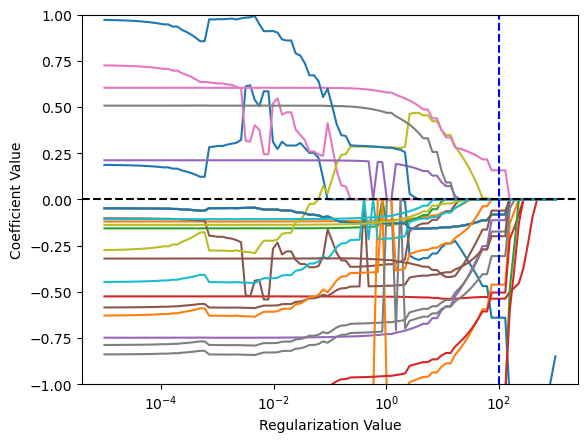

In [234]:
coefficients.plot(x='regularization', logx=True, xlabel='Regularization Value', ylabel='Coefficient Value', kind='line', legend=False)
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=100, color='blue', linestyle='--')
plt.ylim(-1, 1)
plt.show()

## Helper Methods for Finding the most important coefficients

In [235]:
def getPriority(coefficients):
    priority = {column: -1 for column in coefficients.columns}
    zeros = []
    
    for index, row in coefficients.iterrows():
        count = 0
        for col in priority.keys():
            if row[col] == 0: count += 1
            if priority.get(col) == -1 and row[col] == 0: priority[col] = index
        zeros.append(count)
    
    return priority, zeros

In [236]:
priority, zeros = getPriority(coefficients)
priority

{'Intercept': 55,
 'C(gender)[T.Male]': 81,
 'C(senior_citizen)[T.Yes]': 61,
 'C(partner)[T.Yes]': 95,
 'C(dependents)[T.Yes]': 89,
 'C(phone_service)[T.Yes]': 79,
 'C(multiple_lines)[T.No phone service]': 55,
 'C(multiple_lines)[T.Yes]': 89,
 'C(internet_service)[T.Fiber optic]': 85,
 'C(internet_service)[T.No]': 89,
 'C(online_security)[T.No internet service]': 89,
 'C(online_security)[T.Yes]': 60,
 'C(online_backup)[T.No internet service]': 89,
 'C(online_backup)[T.Yes]': 92,
 'C(device_protection)[T.No internet service]': 89,
 'C(device_protection)[T.Yes]': 57,
 'C(tech_support)[T.No internet service]': 89,
 'C(tech_support)[T.Yes]': 62,
 'C(streaming_tv)[T.No internet service]': 89,
 'C(streaming_tv)[T.Yes]': 57,
 'C(streaming_movies)[T.No internet service]': 89,
 'C(streaming_movies)[T.Yes]': 61,
 'C(contract)[T.One year]': 92,
 'C(contract)[T.Two year]': 92,
 'C(paperless_billing)[T.Yes]': 59,
 'C(payment_method)[T.Credit card (automatic)]': 89,
 'C(payment_method)[T.Electronic 

In [253]:
zeros[78]

6

In [254]:
coefficients.iloc[78]

Intercept                                       -0.261315
C(gender)[T.Male]                               -0.034424
C(senior_citizen)[T.Yes]                         0.000000
C(partner)[T.Yes]                               -0.535598
C(dependents)[T.Yes]                            -0.490795
C(phone_service)[T.Yes]                         -0.005451
C(multiple_lines)[T.No phone service]            0.000000
C(multiple_lines)[T.Yes]                        -0.479896
C(internet_service)[T.Fiber optic]               0.251121
C(internet_service)[T.No]                       -0.144827
C(online_security)[T.No internet service]       -0.144827
C(online_security)[T.Yes]                       -0.811505
C(online_backup)[T.No internet service]         -0.144827
C(online_backup)[T.Yes]                         -0.773444
C(device_protection)[T.No internet service]     -0.144827
C(device_protection)[T.Yes]                     -0.368814
C(tech_support)[T.No internet service]          -0.144827
C(tech_support